In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.tree as tree

In [52]:
titanic = pd.read_csv(r"C:\Users\sande\titanic\train.csv")
titanic.shape
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [55]:
df=titanic
maleDF = df[df.Sex == 'male']
FemaleDF = df[df.Sex == 'female']

maleDF['Age'] = maleDF['Age'].fillna(maleDF['Age'].mean())
print(maleDF)

     PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

           Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.000000

C:\Users\sande\AppData\Local\Temp\ipykernel_10388\3058202726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maleDF['Age'] = maleDF['Age'].fillna(maleDF['Age'].mean())


In [56]:
FemaleDF['Age'] = FemaleDF['Age'].fillna(FemaleDF['Age'].mean())
print(FemaleDF)

     PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                                  Name     Sex        Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
..                                                 ...     ...        ...   
880 

C:\Users\sande\AppData\Local\Temp\ipykernel_10388\142931815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FemaleDF['Age'] = FemaleDF['Age'].fillna(FemaleDF['Age'].mean())


In [57]:
totalDF = [maleDF , FemaleDF]
finalDF = pd.concat(totalDF)
print("final df")
print(finalDF)

final df
     PassengerId  Survived  Pclass  \
0              1         0       3   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                             Name     Sex        Age  SibSp  \
0                         Braund, Mr. Owen Harris    male  22.000000      1   
4                        Allen, Mr. William Henry    male  35.000000      0   
5                                Moran, Mr. James    male  30.726645      0   
6                         McCarthy, Mr. Timothy J    male  54.000000      0   
7                  Palsson, Master. Gosta Leonard    male   2.000000      3   
..                                            ...     ...   

In [58]:
print(finalDF['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [59]:
finalDF['Embarked']=finalDF['Embarked'].fillna('S')

In [60]:
titanic=finalDF

In [61]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


In [62]:
adults = {'male':1,'female':0}
ad = titanic.Sex.map(adults)
titanic['Sex'] = ad
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,30.726645,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",0,25.000000,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",0,22.000000,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.000000,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S


<AxesSubplot: xlabel='Sex', ylabel='Age'>

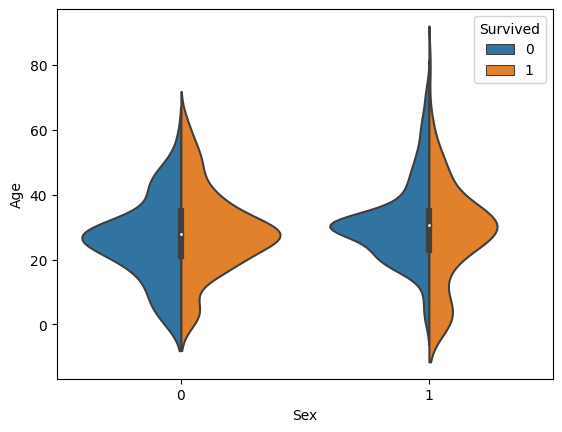

In [63]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = titanic, split = True)

<AxesSubplot: xlabel='Family_Size', ylabel='Survived'>

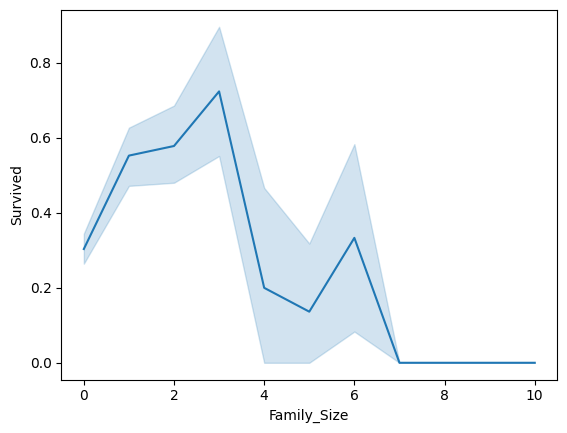

In [64]:
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1
sns.lineplot(x ='Family_Size', y ='Survived', data = titanic)

<AxesSubplot: xlabel='Family_Size', ylabel='Alone'>

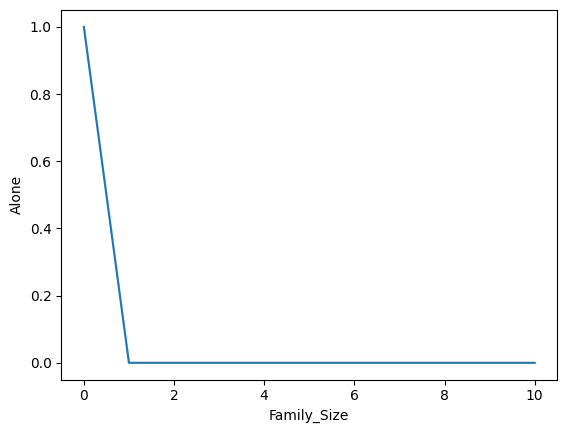

In [65]:
sns.lineplot(x ='Family_Size', y ='Alone', data = titanic)

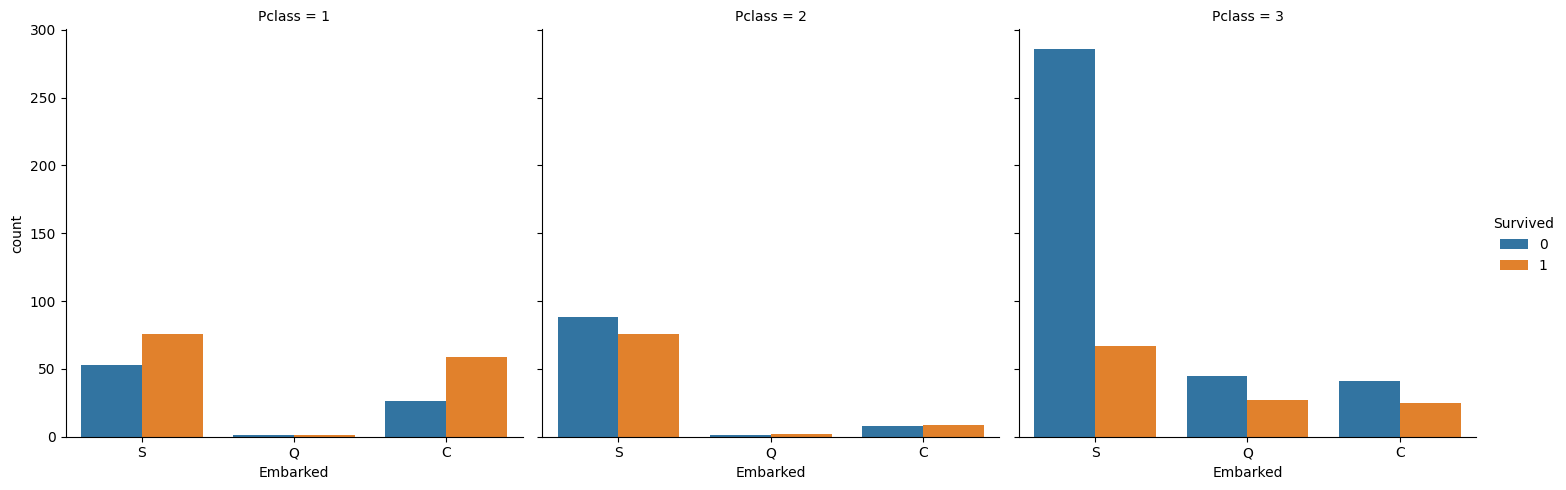

In [66]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = titanic)

<AxesSubplot: xlabel='Age', ylabel='Survived'>

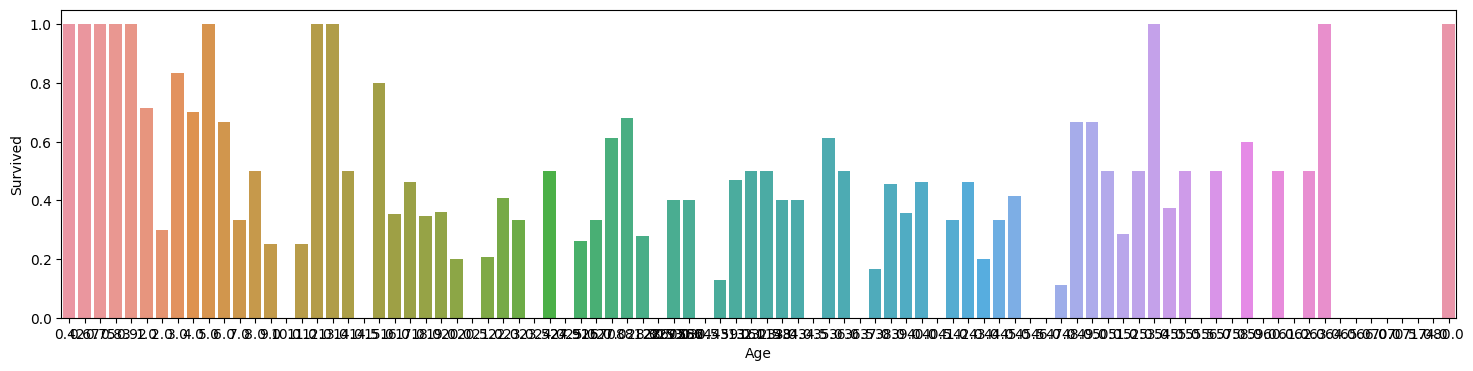

In [67]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

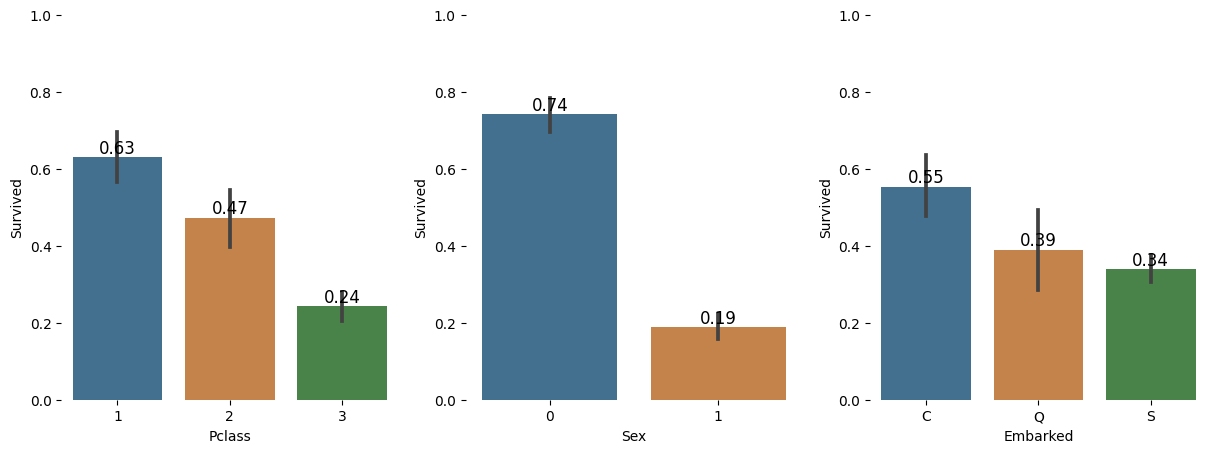

In [68]:
def plot_survival_rates(var):
  xtick_order = titanic[var].value_counts().index.sort_values()

  g = sns.barplot(x=var, y="Survived", 
                data=titanic, saturation=.5, order=xtick_order)
  g.set(ylim=(0, 1))
 
  for spine in g.spines:
    g.spines[spine].set_visible(False)


  ax = plt.gca()
  
  for p in ax.patches:
      ax.text(p.get_x() + p.get_width()/2., p.get_height(),
              '%0.2f' % p.get_height(), 
              fontsize=12, color='black', ha='center', va='bottom')
plt.figure(figsize = [20, 5]) 
categorical_vars = ['Pclass','Sex','Embarked']
for i in range(len(categorical_vars)):
  plt.subplot(1,4,i+1)
  plot_survival_rates(categorical_vars[i])

In [69]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
titanic['Embarked'] = model.fit_transform(titanic['Embarked'])
titanic.head(5)
titanic= titanic.drop(['Cabin'], axis = 1)
titanic= titanic.drop(['Name'], axis = 1)
titanic = titanic.drop(['PassengerId','Ticket'], axis =1)

In [70]:
from sklearn.model_selection import train_test_split
data_train,data_test= train_test_split(titanic,test_size = 0.25,random_state=42)

In [71]:
titanic_train = data_train.drop(['Survived'], axis =1 )
titanic_traintarget = data_train['Survived']
titanic_pred = data_test.drop(['Survived'], axis =1 )
titanic_predtarget = data_test['Survived']

In [72]:
model = tree.DecisionTreeClassifier(criterion='entropy',max_depth= 9)

In [73]:

model.fit(titanic_train,titanic_traintarget)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

[Text(0.4581896551724138, 0.95, 'X[1] <= 0.5\nentropy = 0.957\nsamples = 668\nvalue = [415, 253]'),
 Text(0.2827586206896552, 0.85, 'X[0] <= 2.5\nentropy = 0.837\nsamples = 240\nvalue = [64, 176]'),
 Text(0.1310344827586207, 0.75, 'X[5] <= 28.856\nentropy = 0.304\nsamples = 129\nvalue = [7, 122]'),
 Text(0.10344827586206896, 0.65, 'X[5] <= 28.231\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(0.0896551724137931, 0.55, 'X[2] <= 23.5\nentropy = 0.451\nsamples = 53\nvalue = [5, 48]'),
 Text(0.07586206896551724, 0.45, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.10344827586206896, 0.45, 'X[2] <= 27.458\nentropy = 0.527\nsamples = 42\nvalue = [5, 37]'),
 Text(0.06896551724137931, 0.35, 'X[5] <= 19.875\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.041379310344827586, 0.25, 'X[5] <= 13.429\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.027586206896551724, 0.15, 'X[2] <= 25.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.013793103448275862, 

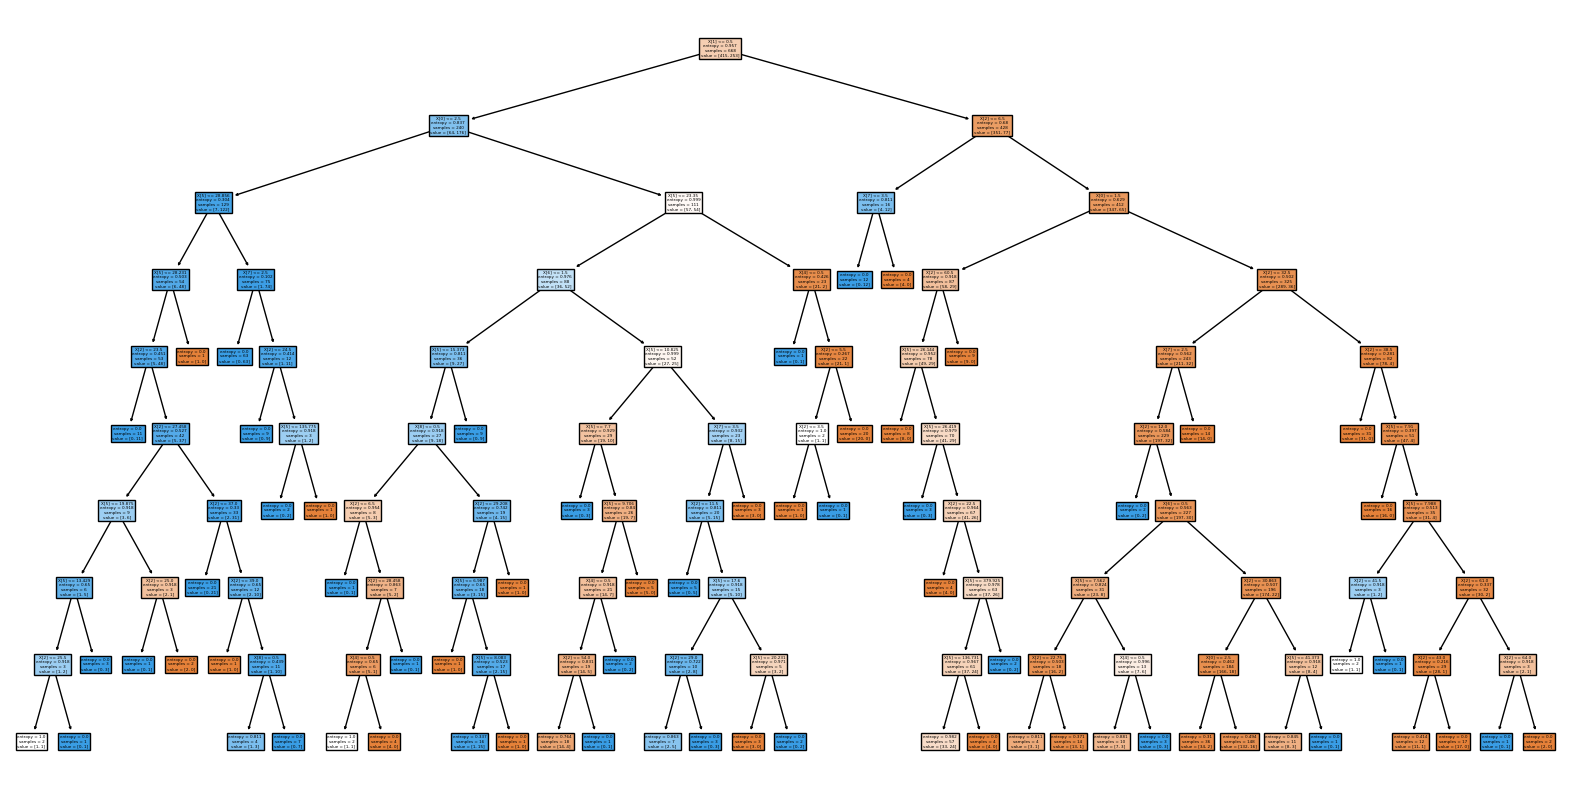

In [74]:
plt.figure(figsize=(20,10))
tree.plot_tree(model,filled=True)